In [2]:
import pandas as pd
import numpy as np
dfec = pd.read_csv("edx_courses.csv")
dfec

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https:

Comenzamos cargando los datos 

In [3]:
dfec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

Tipos de datos

In [4]:
#verifico los nulos y los que serian mas relevantes en este caso seria el numero de inscripto
dfec.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

Verifico si tengo nulos

In [5]:
dfec = dfec.dropna(subset=['n_enrolled'])

Elimino dichos nulos de la columna n_enrolled

In [6]:
# cambiar el tipo de dato en la columna de numeros de inscriptos a entero
dfec['n_enrolled'] = dfec['n_enrolled'].str.replace(',', '').astype(int)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_836\4263034746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfec['n_enrolled'] = dfec['n_enrolled'].str.replace(',', '').astype(int)


Cambio el tipo de dato a numérico en la columna n_enrolled

In [11]:
# Crear columnas para indicar si el curso es gratuito y el costo del certificado verificado
dfec['is_free'] = dfec['price'].apply(lambda x: 'FREE' if 'FREE' in x else 'PAY')
dfec['certificate_cost'] = dfec['price'].str.extract(r'(\$\d+)').fillna('$0')

# Convertir la columna de costo de certificado en un valor numérico
dfec['certificate_cost'] = dfec['certificate_cost'].str.replace('$', '').astype(float)
# elimino la columna price
dfec = dfec.drop('price', axis=1)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_836\2672455920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfec['is_free'] = dfec['price'].apply(lambda x: 'FREE' if 'FREE' in x else 'PAY')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_836\2672455920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfec['certificate_cost'] = dfec['price'].str.extract(r'(\$\d+)').fillna('$0')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_836\2672455920.py:6: FutureWarning: The default value of regex will change from 

Aqui creamos columnas is_paid y certificate_costo, para diferenciar el costo del certificado con el costo del curso en si.
Tambien eliminamos la columna "price"

In [12]:
# Contar filas duplicadas en el DataFrame
num_duplicates = dfec.duplicated().sum()

print("Cantidad de filas duplicadas:", num_duplicates)

Cantidad de filas duplicadas: 1


In [13]:
# Eliminar las filas duplicadas del DataFrame
dfecnuevo = dfec.drop_duplicates()
dfecnuevo

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,course_description,course_syllabus,course_url,is_free,certificate_cost
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,FREE,49.0
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,FREE,49.0
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...,FREE,90.0
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge,FREE,199.0
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...,FREE,249.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,StudioX: Creating a Course with edX Studio,Learn the fundamentals of creating courses on ...,20355,Self-paced on your time,edX,Nina Huntemann-Ben Piscopo,Introductory,Education & Teacher Training,English,English,4–6 hours per week,3 Weeks,"In this course, we will introduce you to edX S...",NaN,https://www.edx.org/course/studiox-creating-a-...,FREE,99.0
966,Introducción a las ondas gravitacionales,"En este curso, junto con la Dra. Gabriela Gonz...",8657,Self-paced on your time,Universidad Nacional de Córdoba,Gabriela González,Introductory,Science,Español,"English, Español",5–7 hours per week,4 Weeks,En este curso conocerás sobre las ondas gravit...,Introducción: En este curso vamos a hablar de ...,https://www.edx.org/course/introduccion-a-las-...,FREE,50.0
969,Global China: From the Mongols to the Ming,Explore the impact of the conquest dynasties a...,41902,Self-paced on your time,Harvard University,Peter K. Bol-William C. Kirby,Introductory,History,English,"English, 中文",1–3 hours per week,15 Weeks,"In the 13th century, by force of arms, the Mon...",NaN,https://www.edx.org/course/global-china-from-t...,FREE,139.0
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...,FREE,139.0


In [14]:
# Visualizo las estadisticas de mis variable numericas
dfecnuevo.describe().round(3)

,n_enrolled,certificate_cost
count,854.000,854.000
mean,53208.793,101.643
std,119091.056,70.640
min,5001.000,5.000
25%,11764.250,49.000
50%,24119.000,79.000
75%,54652.500,149.000
max,2442271.000,450.000


Aqui se puede ver que el promedio en cuanto al numero de subcripteros es de 53209, y el promedio en cuanto 
al precio al certificado es de 102 dolares si tomamos como moneda al dolar.

In [16]:
# Contar la cantidad de cursos gratuitos y pagos
course_counts = dfecnuevo['is_free'].value_counts()

# Obtener la cantidad de cursos gratuitos y pagos
free_courses = course_counts['FREE']


print("Cantidad de cursos gratuitos:", free_courses)

# cursos con certificado gratis
cantidad_cursos_gratis = len(dfecnuevo[dfecnuevo['certificate_cost'] == 0])

print("Cantidad de cursos con certificado gratis:", cantidad_cursos_gratis)



Cantidad de cursos gratuitos: 854
Cantidad de cursos con certificado gratis: 0


Todos los cursos son gratis, pero tienen un costo para certificar el mismo

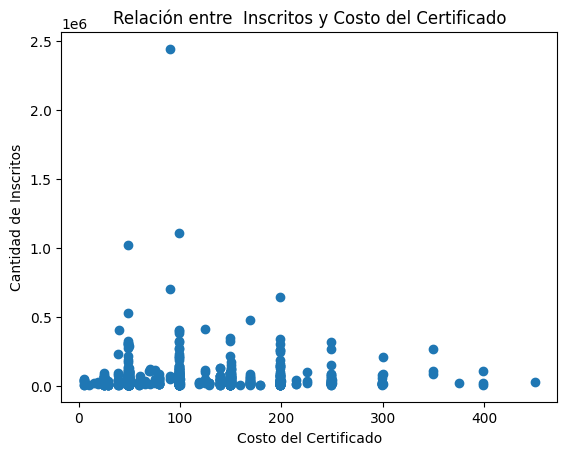

In [17]:
# relacion entre nro de inscriptos y costo del certificado
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.scatter(dfecnuevo['certificate_cost'], dfecnuevo['n_enrolled'])

# Configurar el título y etiquetas de los ejes
plt.title('Relación entre  Inscritos y Costo del Certificado')
plt.xlabel('Costo del Certificado')
plt.ylabel('Cantidad de Inscritos')

# Mostrar el gráfico
plt.show()


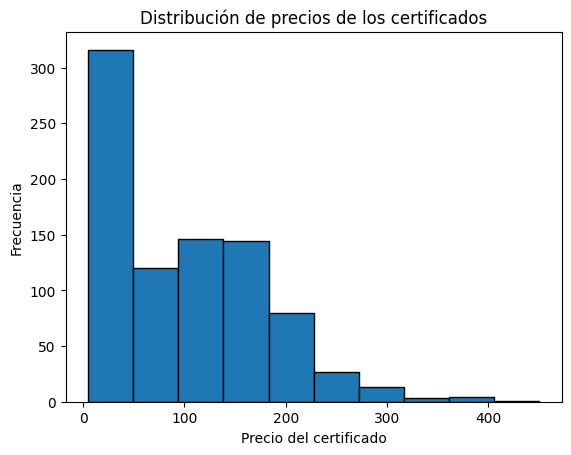

In [18]:
#Histograma con la distribucion de precios de los certificados
import matplotlib.pyplot as plt

# Filtra solo los datos de los certificados pagos
precios_certificados = dfecnuevo[dfecnuevo['certificate_cost'] > 0]['certificate_cost']

# Crea el histograma
plt.hist(precios_certificados, bins=10, edgecolor='black')

# Establece los títulos y etiquetas del gráfico
plt.title('Distribución de precios de los certificados')
plt.xlabel('Precio del certificado')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()


In [20]:
cantidad_cursos_costo_menor_200 = len(dfecnuevo[dfecnuevo['certificate_cost'] < 200])

print("Cantidad de cursos con costo de certificado menor a $200:", cantidad_cursos_costo_menor_200)

Cantidad de cursos con costo de certificado menor a $200: 799


Aquellos cursos cuyo costo supera los 200 dolares dejan de tener demanda

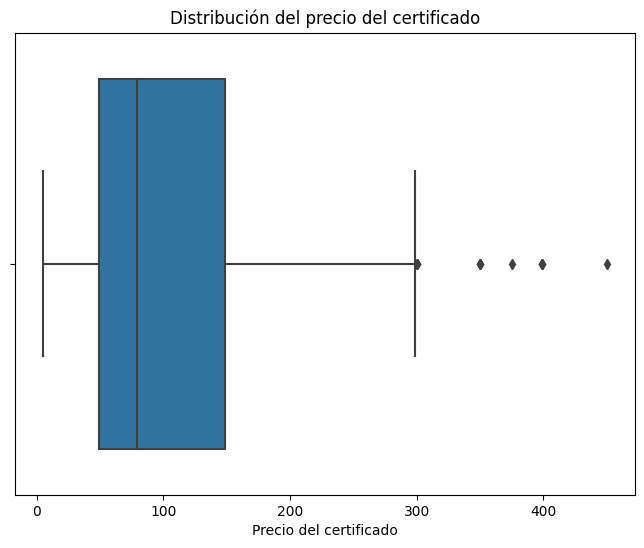

In [21]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=dfec, x='certificate_cost')
plt.title('Distribución del precio del certificado')
plt.xlabel('Precio del certificado')
plt.show()

C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning:

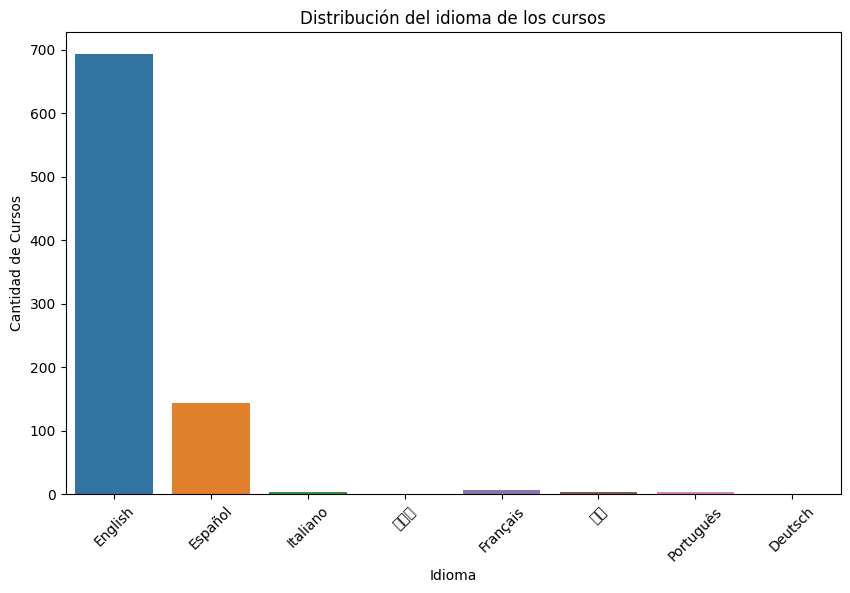

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

#Visualización de la distribución del idioma:
plt.figure(figsize=(10, 6))
sns.countplot(data=dfecnuevo, x='language')
plt.xticks(rotation=45)
plt.xlabel('Idioma')
plt.ylabel('Cantidad de Cursos')
plt.title('Distribución del idioma de los cursos')
plt.show()

Se puede observar que la mayoria de los cursos con mas demandas son aquellos en Ingles y Español

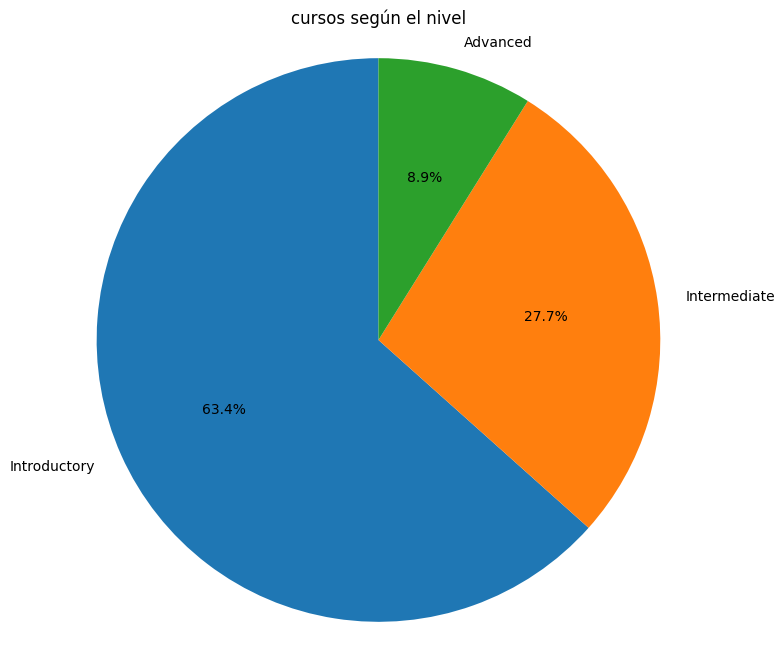

In [23]:
# Calcular la cantidad de cursos por nivel
cursos_por_nivel = dfec['Level'].value_counts()

# Crear gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(cursos_por_nivel, labels=cursos_por_nivel.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('cursos según el nivel')
plt.show()

De acuerdo al nivel de los cursos, tienen una mayor demanda los de nivel introductorio seguido por los de nivel intermedio


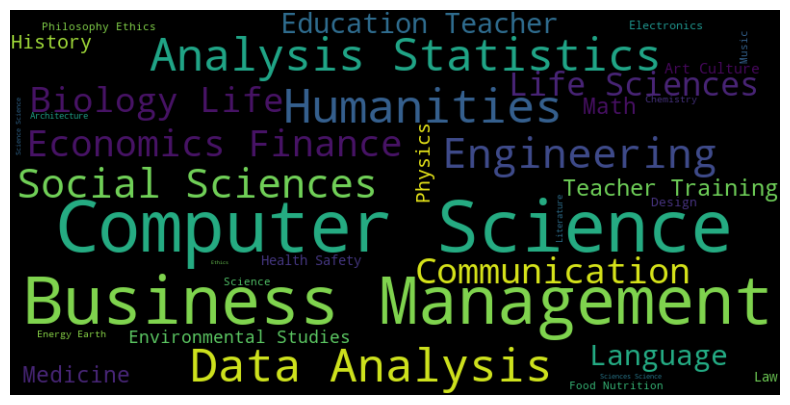

In [25]:
#wordcloud en base a las asignaturas
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(dfec['subject'])

wordcloud = WordCloud(width=800, height=400).generate(text)

# Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Palabras como "Computer Science" , "Business Management", "Data Alalysis" etc. Son palabras reletantes de este conjunto de datos.

In [25]:
# dfecnuevo.to_csv('edx.csv', index=False)
